In [1]:
import pandas as pd
from scipy.stats import chi2_contingency, pearsonr
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://gist.githubusercontent.com/kartikjoshi267/afdbd38f1842037f4845237cba184e5d/raw/819a506fcb683f89d8584c3b170f45e04e5056a4/student_dropout_analysis.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
sample_data = data.sample(500, random_state=42)

# Assuming you have the sample data in a pandas DataFrame called 'sample_data'

# Step 1: Calculate sample statistic
sample_statistic = sample_data['Mother\'s occupation'].mean()  # Example: Mean

# Step 2: Choose a confidence level
confidence_level = 0.95  # For a 95% confidence level

# Step 3: Calculate the standard error (assuming you're estimating the population mean)
sample_size = len(sample_data)
standard_deviation = np.std(data['Mother\'s occupation'], ddof=1)  # ddof=1 for sample standard deviation
standard_error = standard_deviation / np.sqrt(sample_size)

# Step 4: Compute the margin of error
margin_of_error = ((1 - confidence_level) / 2) * standard_error

# Step 5: Construct the confidence interval
lower_bound = sample_statistic - margin_of_error
upper_bound = sample_statistic + margin_of_error

print("Sample Statistic:", sample_statistic)
print("Confidence Interval:", (lower_bound, upper_bound))
print("Margin of error:", margin_of_error)

Sample Statistic: 7.008
Confidence Interval: (7.0035302927435605, 7.0124697072564395)
Margin of error: 0.004469707256439333


4424


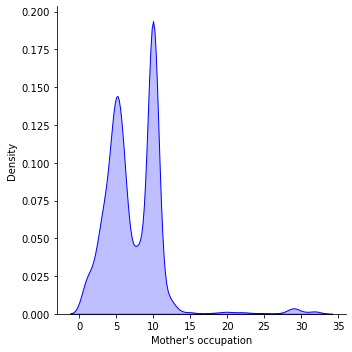

500


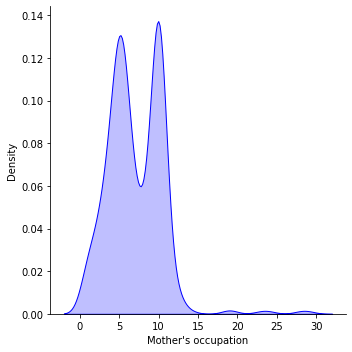

In [4]:
print(len(data))
sns.displot(data['Mother\'s occupation'], kind='kde', color='blue', fill=True)
plt.show()
print(len(sample_data))
sns.displot(sample_data['Mother\'s occupation'], kind='kde', color='blue', fill=True)
plt.show()

In [5]:
all_occupations = [i for i in range(1, 47)]
academic_inclination = [3,21,19,22,23,24,25,27,20]
non_academic_inclination = list(set(all_occupations).difference(set(academic_inclination)))

sample_data.loc[sample_data["Mother\'s occupation"].isin(academic_inclination), "Mother\'s occupation"] = 0
sample_data.loc[sample_data["Mother\'s occupation"].isin(non_academic_inclination), "Mother\'s occupation"] = 1

### Define Null and Alternative Hypothesis

Null Hypothesis (H0): There is no difference in dropout rates between different mother's occupation (=)

Alternative Hypothesis (H1): There is a difference in dropout rates between different mother's occupation (not equal to =/=)

In [6]:
# Choose a Significance Level (alpha)
alpha = 0.05

# Collect Data
# Create a contingency table of observed frequencies
observed = pd.crosstab(sample_data['Mother\'s occupation'], sample_data['Target'])
print(observed, "\n\n")

# Perform Chi-squared Test
chi2, p_value, _, expected = chi2_contingency(observed)
print(chi2, p_value)
print(expected)

# Interpret Results
if p_value <= alpha:
    print("Reject Null Hypothesis: There is evidence of a difference in dropout rates between different Mother's occupation.")
else:
    print("Fail to reject Null Hypothesis: There is no evidence of a difference in dropout rates between different Mother's occupation.")

Target               Dropout  Enrolled  Graduate
Mother's occupation                             
0                         16         9        13
1                        154        80       228 


3.2644042744609614 0.1954985850398997
[[ 12.92    6.764  18.316]
 [157.08   82.236 222.684]]
Fail to reject Null Hypothesis: There is no evidence of a difference in dropout rates between different Mother's occupation.


NULL HYPOTHESIS 2: Students whose mothers are in occupations with academic inclination are less likely to drop out

ALTERNATE HYPOTHESIS 2: Students whose mothers are in occupations with academic inclination are more likely to drop out

In [7]:
# Calculate Spearman's rank correlation
encoder = LabelEncoder()
correlation, p_value = pearsonr(sample_data['Mother\'s occupation'], encoder.fit_transform(sample_data["Target"]))

print("Spearman's Rank Correlation Coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05
if p_value <= alpha:
    print("Reject Null Hypothesis: There is evidence that students whose mothers are in occupations with academic inclination are more likely to drop out.")
else:
    print("Fail to reject Null Hypothesis: There is no evidence that students whose mothers are in occupations with academic inclination are more likely to drop out.")


Spearman's Rank Correlation Coefficient: 0.07076473234978575
p-value: 0.11402243149684313
Fail to reject Null Hypothesis: There is no evidence that students whose mothers are in occupations with academic inclination are more likely to drop out.
